[{'title': 'paper-150', 'b0': 1090.0, 'd1': 922.0, 'd2': 0.2, 'ei': 0.2, 'Ac': 0, 'Ag': 0, 'Al': 0, 'Am': 0, 'Ar': 0, 'As': 0, 'At': 0, 'Au': 0, 'B': 0, 'Ba': 0, 'Be': 0, 'Bi': 0, 'Bk': 0, 'Br': 0, 'C': 0, 'Ca': 0, 'Cd': 0, 'Ce': 0, 'Cf': 0, 'Cl': 0, 'Cm': 0, 'Co': 1, 'Cr': 1, 'Cs': 0, 'Cu': 0, 'Dy': 0, 'Er': 0, 'Es': 0, 'Eu': 0, 'F': 0, 'Fe': 1, 'Fm': 0, 'Fr': 0, 'Ga': 0, 'Gd': 0, 'Ge': 0, 'H': 0, 'He': 0, 'Hf': 0, 'Hg': 0, 'Ho': 0, 'I': 0, 'In': 0, 'Ir': 0, 'K': 0, 'Kr': 0, 'La': 0, 'Li': 0, 'Lr': 0, 'Lu': 0, 'Md': 0, 'Mg': 0, 'Mn': 1, 'Mo': 0, 'N': 0, 'Na': 0, 'Nb': 0, 'Nd': 0, 'Ne': 0, 'Ni': 1, 'No': 0, 'Np': 0, 'O': 0, 'Os': 0, 'P': 0, 'Pa': 0, 'Pb': 0, 'Pd': 0, 'Pm': 0, 'Po': 0, 'Pr': 0, 'Pt': 0, 'Pu': 0, 'Ra': 0, 'Rb': 0, 'Re': 0, 'Rh': 0, 'Rn': 0, 'Ru': 0, 'S': 0, 'Sb': 0, 'Sc': 0, 'Se': 0, 'Si': 0, 'Sm': 0, 'Sn': 0, 'Sr': 0, 'Ta': 0, 'Tb': 0, 'Tc': 0, 'Te': 0, 'Th': 0, 'Ti': 0, 'Tl': 0, 'Tm': 0, 'U': 0, 'V': 0, 'W': 0, 'Xe': 0, 'Y': 0, 'Yb': 0, 'Zn': 0, 'Zr': 0}, {'title': 'pa

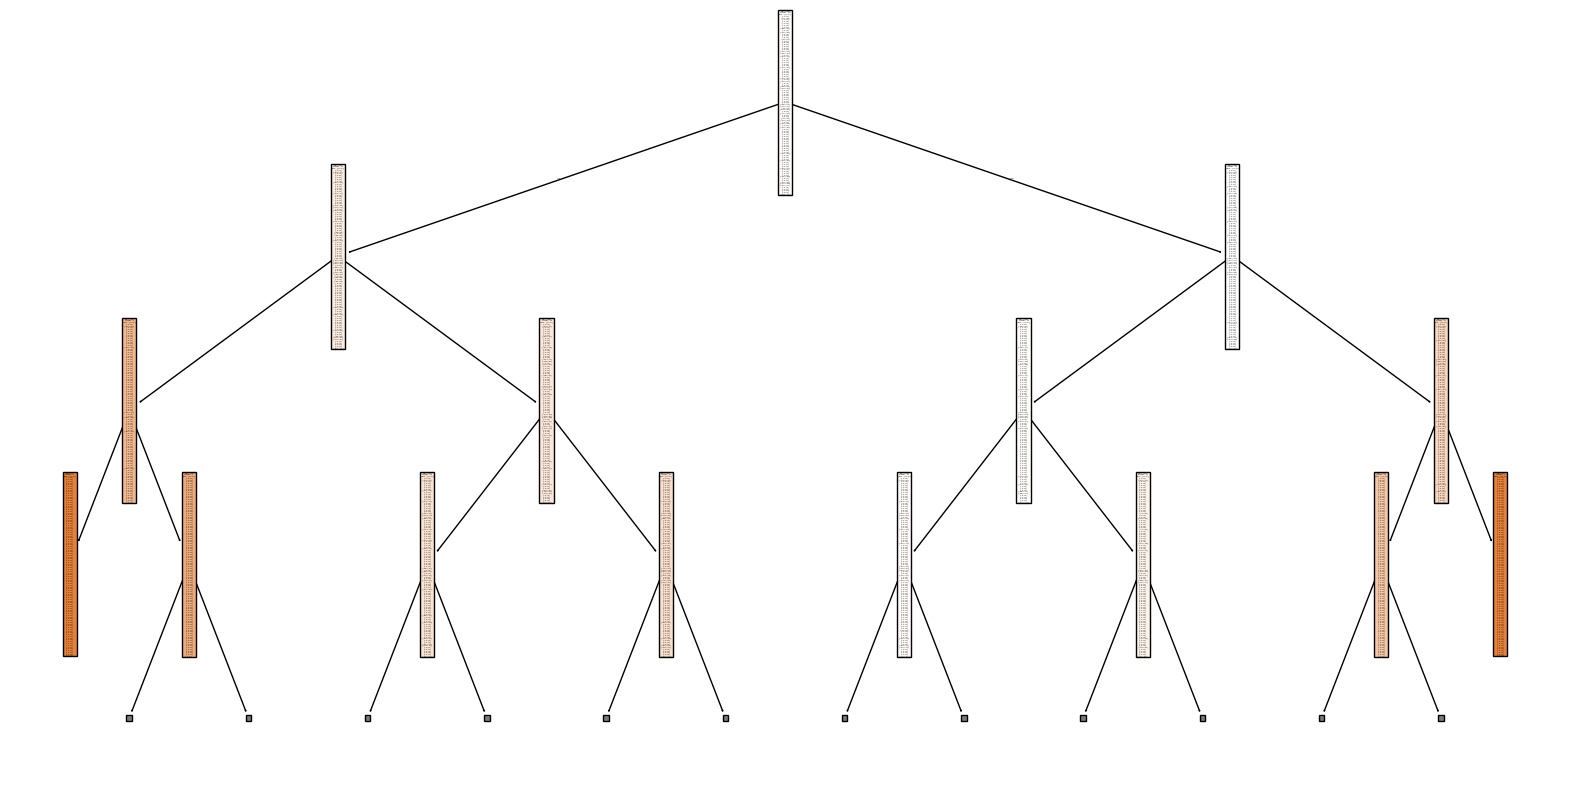

============================== Fold 2 Results ==============================
Title | Actual | Predicted
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-7 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: C, I, N, P, S
paper-109 | Actual: C, Mg | Predicted: Cr, Mo, Nb, Ta, Ti, Zr
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-144 | Actual: Hf, Mo, N, Ta, Ti, Zr | Predicted: Cr, Mo, Nb, Ta, Ti, Zr
paper-206 | Actual: Al, Co, Cr, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-223 | Actual: Al, Cr, Cu, Fe, Ni, Si, Ti | Predicted: Co, Cr, Fe, Mn, Ni
paper-237 | Actual: Nb, Ti, V, Zr | Predicted: Al, Co, Cr, Fe, Ni
paper-238 | Actual: Al, Co, Cu, Mn, Ni | Predicted: Al, Cr, Mo, Nb, V
paper-239 | Actual: Al, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-257 | Actual: Co, Cr, Cu, Mn, Ni | Predicted: Co, Cr, Cu, Mn, Ni
Accuracy for Fold 2: 16.67%

======

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry["composition"]
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in filtered_data:
    row = {
        "title": entry["title"],
        "b0": round(float(entry["b0"]), 4), # Changed to directly convert to float and round
        "d1": round(float(entry["d1"]), 4),
        "d2": round(float(entry["d2"]), 4),
        "ei": round(float(entry["ei"]), 4)
    }
    # Replace infinite values with NaN
    for key in ["b0", "d1", "d2", "ei"]:
        if np.isinf(row[key]):
            row[key] = np.nan  # Assign NaN for infinite values

    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
print(features);
X = df[["b0", "d1", "d2", "ei"]].astype(np.float64) # Keep as float64
# Impute NaN values in X with the mean of each column
X = X.fillna(X.mean())
X = X.clip(lower=-1e10, upper=1e10) # Clip to prevent extreme values

Y = df[elements]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

    if fold == 1:  # Visualize tree for first fold
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=elements, filled=True, max_depth=3)
        plt.show()

============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Hf, Nb, Ta, Ti, V, Zr
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-173 | Actual: F, N, O | Predicted: 
paper-6 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni, Ti
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-208 | Actual: Cr, Fe, Mn, Ni, V | Predicted: C, I, N, P, S
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Nb, Ta, Ti, Zr
paper-224 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Nb, Ta, Ti, Zr
paper-232 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-259 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Cr, Mo, Nb, V
paper-265 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Mn, Ni
Accuracy for Fold 1: 16.67%



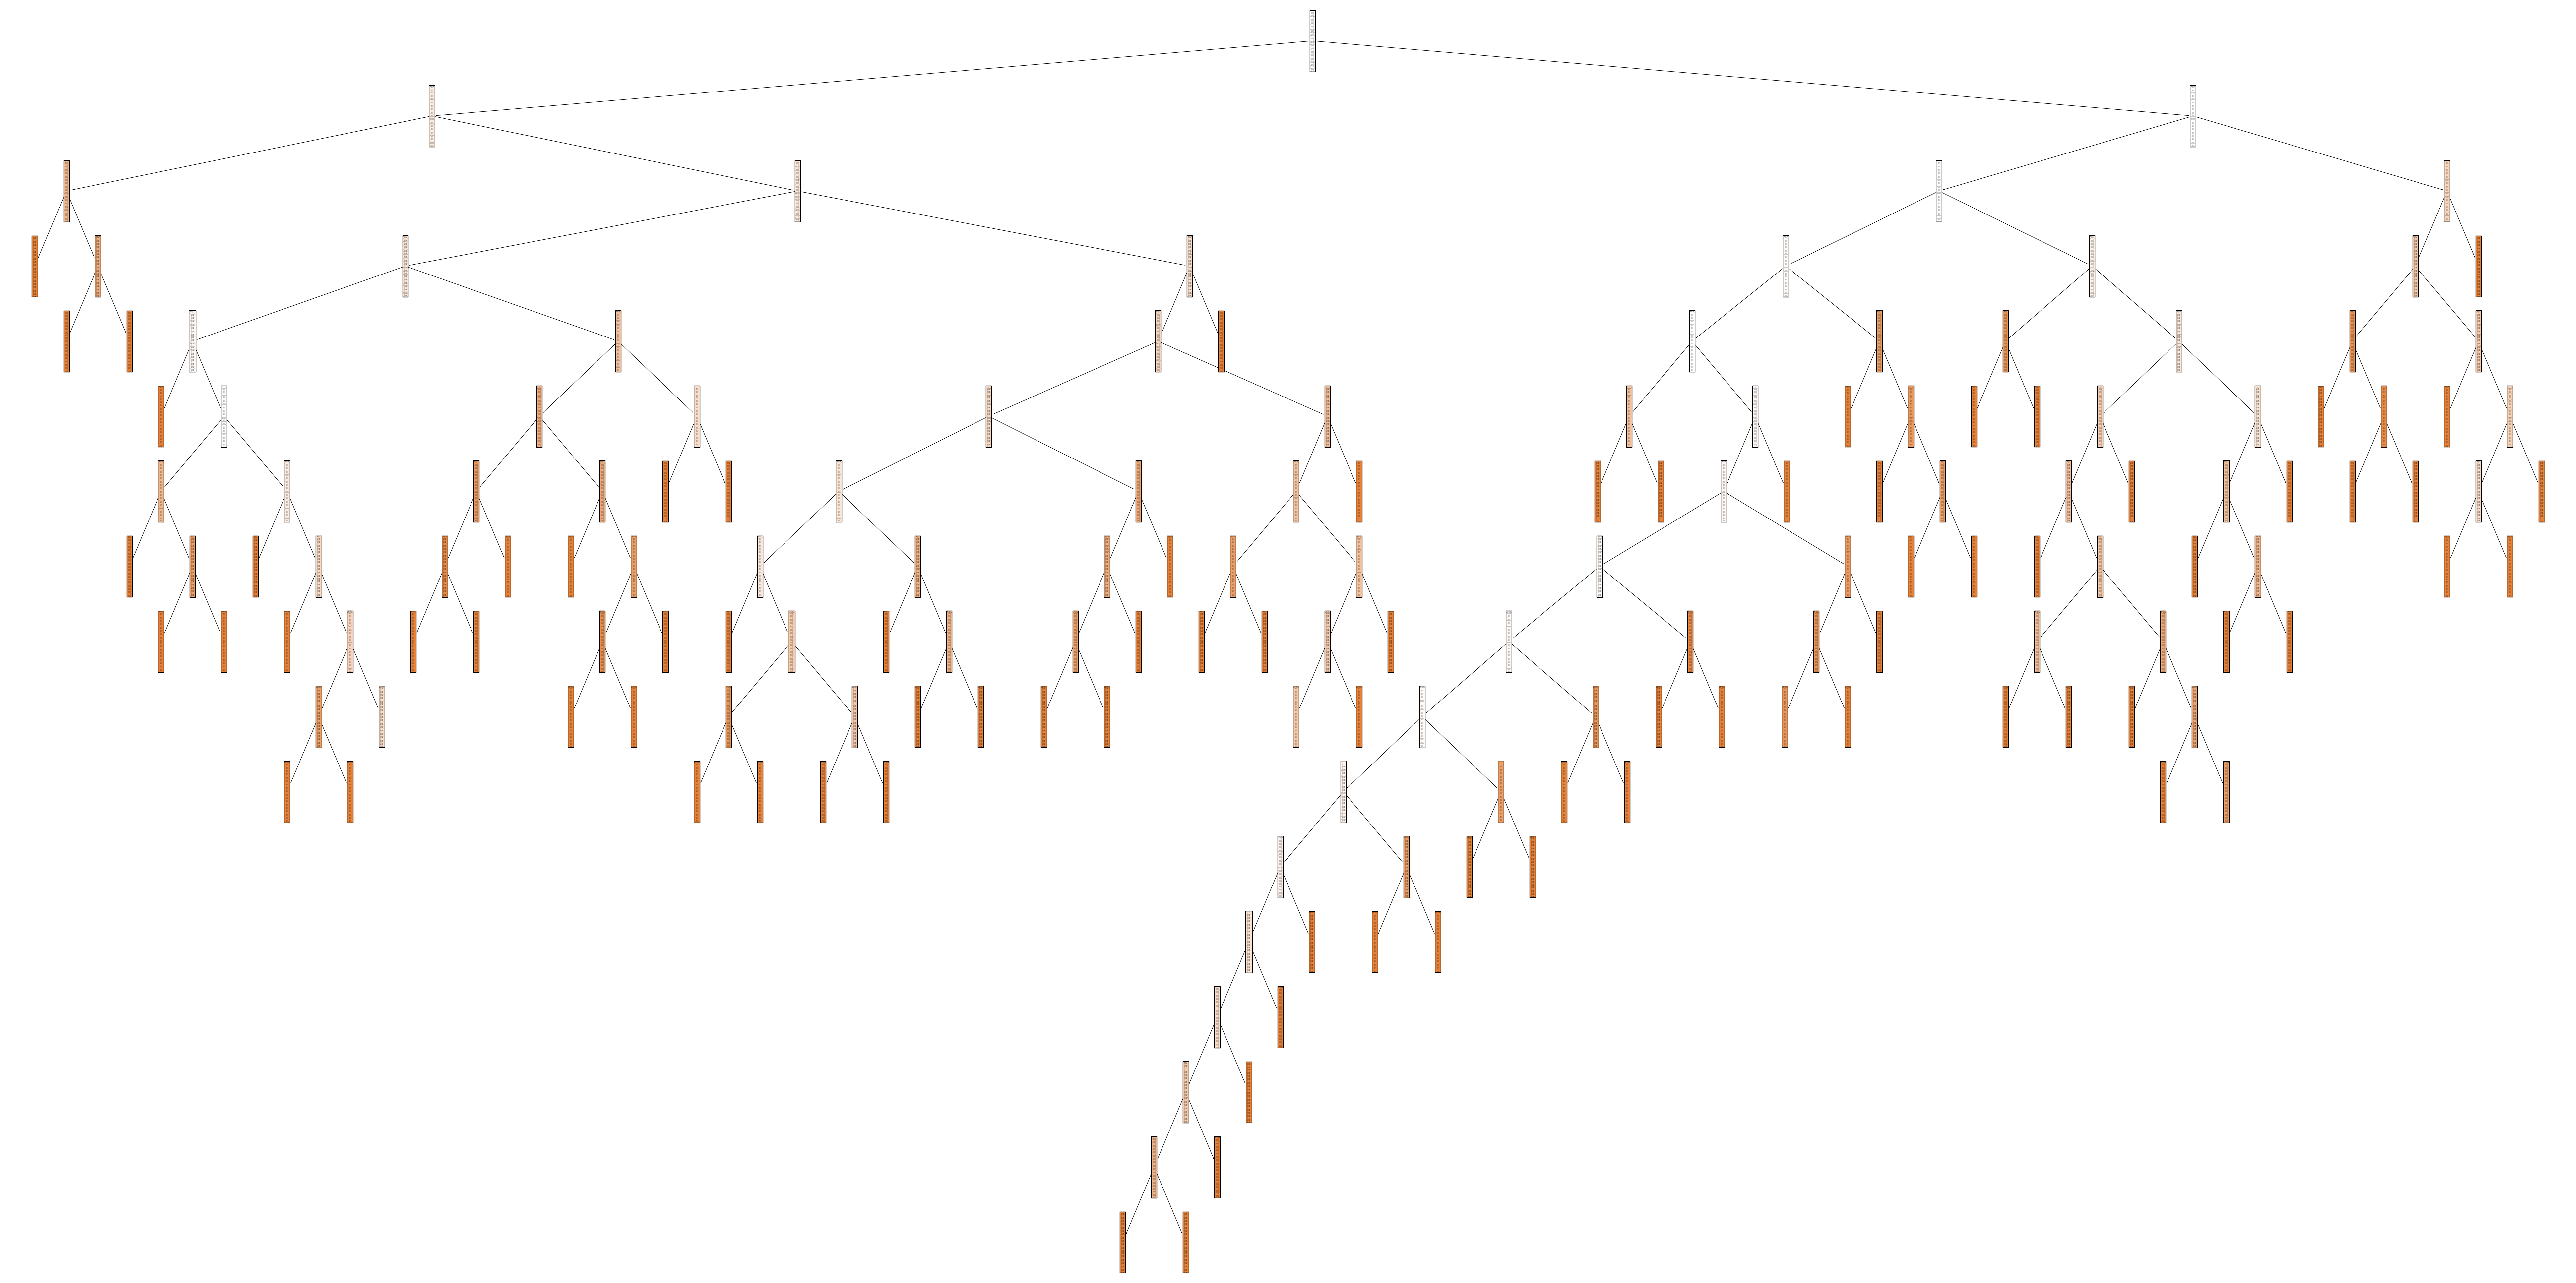

============================== Fold 2 Results ==============================
Title | Actual | Predicted
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-7 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: C, I, N, P, S
paper-109 | Actual: C, Mg | Predicted: Al, Co, Cr, Ni, Ti
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-144 | Actual: Hf, Mo, N, Ta, Ti, Zr | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-206 | Actual: Al, Co, Cr, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-223 | Actual: Al, Cr, Cu, Fe, Ni, Si, Ti | Predicted: Co, Cr, Fe, Mn, Ni
paper-237 | Actual: Nb, Ti, V, Zr | Predicted: Al, Co, Cr, Fe, Ni
paper-238 | Actual: Al, Co, Cu, Mn, Ni | Predicted: Be, Hf, Ti, Zr
paper-239 | Actual: Al, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-257 | Actual: Co, Cr, Cu, Mn, Ni | Predicted: Be, Hf, Ti, Zr
Accuracy for Fold 2: 8.33%

==================

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4)
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)
Y = df[elements]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

    if fold == 1:  # Visualize tree for first fold
        plt.figure(figsize=(100, 50))  # Increase size for better visibility
        plot_tree(model, feature_names=X.columns, class_names=elements, filled=True, max_depth=None)
        plt.show()


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4)
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

    if fold == 1:  # Save tree to PDF for better visibility
        pdf = matplotlib.backends.backend_pdf.PdfPages("decision_tree.pdf")
        fig = plt.figure(figsize=(100, 100))  # Large size for better readability
        plot_tree(model, feature_names=X.columns, class_names=elements, filled=True, max_depth=5, fontsize=12)
        pdf.savefig(fig, bbox_inches="tight")
        pdf.close()
        plt.close(fig)


============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Hf, Nb, Ta, Ti, V, Zr
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-173 | Actual: F, N, O | Predicted: 
paper-6 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni, Ti
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-208 | Actual: Cr, Fe, Mn, Ni, V | Predicted: C, I, N, P, S
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Nb, Ta, Ti, Zr
paper-224 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Hf, Nb, Ta, Ti, Zr
paper-232 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-259 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Cr, Mo, Nb, V
paper-265 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Mn, Ni
Accuracy for Fold 1: 16.67%

============================== Fold 2 R

# Download the decision tree

In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {
    "H", "Li", "Be", "B", "C", "N", "O", "F", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "K", "Ca",
    "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Rb", "Sr", "Y",
    "Zr", "Nb", "Mo", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Cs", "Ba", "La", "Ce", "Pr",
    "Nd", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt",
    "Au", "Hg", "Tl", "Pb", "Bi"
}


# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4)
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

    if fold == 5:  # Save tree to PDF for better visibility
        pdf = matplotlib.backends.backend_pdf.PdfPages("decision_tree.pdf")
        fig = plt.figure(figsize=(300, 300))  # Large size for better readability
        plot_tree(model, feature_names=X.columns, class_names=elements, filled=True, fontsize=12)
        pdf.savefig(fig, bbox_inches="tight")
        pdf.close()
        plt.close(fig)


============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-144 | Actual: Hf, Mo, Ta, Ti, Zr | Predicted: Al, Hf, Nb, Ta, Ti, Zr
paper-129 | Actual: Nb, Ta, Ti, Zr | Predicted: C, Mo, Nb, Ta, W
paper-166 | Actual: C, N | Predicted: O
paper-25 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Cu, Fe, Mn, Si
paper-110 | Actual: Al, Mg, Si | Predicted: O
paper-129 | Actual: Nb, Ta, Ti, Zr | Predicted: C, Mo, Nb, Ta, W
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-138 | Actual: Cr, Mo, Nb, Ta, Ti, Zr | Predicted: Cr, Mo, Nb, Ta, Ti, Zr
paper-140 | Actual: Cr, Mo, Nb, Ta, Ti, Zr | Predicted: Al, Cr, Fe, Ni
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Al, Co, Cr, Fe, Ni
paper-221 | Actual: Al, Co, Cr, Fe, V | Predicted: Al, Co, Cr, Fe, Ni
paper-260 | Actual: Al, Co, Cr, Cu, Fe, Ni | Predicted: Al, Cr, Cu, Fe, Ni
Accuracy for Fold 1: 16.67%

============================== Fold 2 Results =======================

# Random Forest

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4)
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Al, Nb, Ti, Zr
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-173 | Actual: F, N, O | Predicted: 
paper-6 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-208 | Actual: Cr, Fe, Mn, Ni, V | Predicted: Cr
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Al, Cr, Ti
paper-224 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Al, Cr, Ti
paper-232 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Mn, Ni
paper-259 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-265 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Mn, Ni
Accuracy for Fold 1: 16.67%

============================== Fold 2 Results ==============================
Tit

# Adding b0/d1 ratio


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "b0_d1_ratio": round(float(entry["b0"])/(float(entry["d1"])+1e-9), 4)  # Feature interaction
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei", "b0_d1_ratio"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
best_params = grid_search.best_params_

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = RandomForestClassifier(**best_params, random_state=42)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")


============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Hf, Nb, Ta, Ti, V, Zr
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-173 | Actual: F, N, O | Predicted: Cr, Fe
paper-6 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni, Ti
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Mn, Ni
paper-208 | Actual: Cr, Fe, Mn, Ni, V | Predicted: Cr, Fe, Ni
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Al, Co, Cr, Ti
paper-224 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Ti
paper-232 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-259 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-265 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Mn, Ni
Accuracy for Fold 1: 25.00%

============================== Fold 2 Results =================

#MLP

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "b0_d1_ratio": round(float(entry["b0"])/(float(entry["d1"])+1e-9), 4)  # Feature interaction
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei", "b0_d1_ratio"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(128, 128, 64), (256, 128, 64)],  # Deeper network
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0005],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0005]  # Lower learning rates for stability
}

best_model = MLPClassifier(max_iter=500, random_state=42)
grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
best_params = grid_search.best_params_

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    model = MLPClassifier(**best_params, max_iter=500, random_state=42)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 1 Results ==============================
Title | Actual | Predicted
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Cr, Ni, Ti
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-173 | Actual: F, N, O | Predicted: Al, Co, Cr, Fe, Ni
paper-6 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-133 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-208 | Actual: Cr, Fe, Mn, Ni, V | Predicted: Cr, Ni, Ti
paper-213 | Actual: Co, Cr, Fe, Mn | Predicted: Al, Co, Cr, Fe, Ni
paper-224 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Cr
paper-232 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-259 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-265 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Cr
Accuracy for Fold 1: 8.33%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 2 Results ==============================
Title | Actual | Predicted
paper-150 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Cr, Ti
paper-7 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Cr
paper-109 | Actual: C, Mg | Predicted: Cr, Ti
paper-128 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Cr, Ti
paper-144 | Actual: Hf, Mo, N, Ta, Ti, Zr | Predicted: Co, Cr, Fe, Ni
paper-206 | Actual: Al, Co, Cr, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-223 | Actual: Al, Cr, Cu, Fe, Ni, Si, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-237 | Actual: Nb, Ti, V, Zr | Predicted: Al, Co, Cr, Fe, Ni
paper-238 | Actual: Al, Co, Cu, Mn, Ni | Predicted: Cr, Ti
paper-239 | Actual: Al, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-257 | Actual: Co, Cr, Cu, Mn, Ni | Predicted: Cr, Ti
Accuracy for Fold 2: 0.00%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 3 Results ==============================
Title | Actual | Predicted
paper-127 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: Cr
paper-171 | Actual: I, N | Predicted: Cr
paper-1 | Actual: Co, Cr, Cu, Fe, Mn, Si | Predicted: Cr
paper-4 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Co, Cr, Fe, Ni
paper-26 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-32 | Actual: Al, C, Co, Cr, Fe, Mo, Nb, Ni, Ti, W | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-131 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-146 | Actual: Hf, Nb, Ta, Ti, Zr | Predicted: Co, Cr, Ni, Ti
paper-203 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-210 | Actual: C, Mo, Nb, Ta, W | Predicted: Al, Co, Cr, Fe, Ni
paper-217 | Actual: C, Cr, Cu, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-255 | Actual: Al, Nb, Ta, Ti, Zr | Predicted: Co, Cr, Fe, Ni
Accuracy for Fold 3: 0.00%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 4 Results ==============================
Title | Actual | Predicted
paper-138 | Actual: Cr, Mo, Nb, Ta, Ti, Zr | Predicted: Ti
paper-131 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-23 | Actual: Co, Cr, Cu, Fe, Mn, Si | Predicted: Co, Cr, Fe
paper-27 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-137 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Cr, Ni, Ti
paper-202 | Actual: Al, Co, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-209 | Actual: Cr, Fe, Mn, Ni, V | Predicted: 
paper-207 | Actual: Cr, Fe, Mn, Ni, V | Predicted: Cr, Ni, Ti
paper-212 | Actual: C, Mo, Nb, Ta, W | Predicted: Al, Co, Cr, Fe, Ni
paper-227 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-230 | Actual: Al, Co, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-261 | Actual: Al, Cr, Fe, Ni | Predicted: Co, Cr, Fe
Accuracy for Fold 4: 0.00%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 5 Results ==============================
Title | Actual | Predicted
paper-144 | Actual: Hf, Mo, Ta, Ti, Zr | Predicted: Co, Cr, Fe, Ni
paper-174 | Actual: B, C, S | Predicted: Co, Cr, Fe, Ni
paper-22 | Actual: Co, Cr, Cu, Fe, Mn, Si | Predicted: Co, Cr, Fe, Ni
paper-51 | Actual: C, I, N, U | Predicted: Co, Cr, Ni, Ti
paper-31 | Actual: Co, Cr, Fe, H, Mn, Si | Predicted: Co, Cr, Fe, Ni
paper-110 | Actual: Al, Mg, Si | Predicted: Cr, Fe
paper-129 | Actual: Nb, Ta, Ti, Zr | Predicted: Cr
paper-139 | Actual: Hf, Nb, Ta, Ti, V, Zr | Predicted: Co, Cr, Ni, Ti
paper-205 | Actual: Al, Co, Cr, Ni, Ti | Predicted: Co, Cr, Fe, Ni
paper-228 | Actual: Al, Cr, Mo, Ti, V, Zr | Predicted: Co, Cr, Fe, Ni
paper-219 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-260 | Actual: Al, Co, Cr, Cu, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
Accuracy for Fold 5: 8.33%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 6 Results ==============================
Title | Actual | Predicted
paper-152 | Actual: No | Predicted: Co, Cr, Fe, Ni
paper-141 | Actual: Co, Cr, Fe, Mn, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-137 | Actual: Al, Hf, Nb, Ta, Ti, Zr | Predicted: Co, Cr, Fe, Ni
paper-129 | Actual: Nb, Ta, Ti, Zr | Predicted: Cr, Ni
paper-169 | Actual: C, I, N, P, S | Predicted: Co, Cr, Fe
paper-163 | Actual: B, C, S | Predicted: Co, Cr, Fe
paper-5 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-34 | Actual: Al, C, Co, Cr, Fe, Mo, Nb, Ni, Ti, W | Predicted: Cr, Ni
paper-229 | Actual: Al, Nb, Ti, V, Zr | Predicted: Cr, Ni
paper-233 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-236 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-250 | Actual: Co, Cr, Cu, Fe, Ni | Predicted: Co, Cr, Fe, Ni
Accuracy for Fold 6: 16.67%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 7 Results ==============================
Title | Actual | Predicted
paper-134 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Co, Cr, Fe
paper-140 | Actual: Cr, Mo, Nb, Ta, Ti, Zr | Predicted: Cr, Fe
paper-145 | Actual: Al, Hf, Nb, Ta, Ti, Zr | Predicted: Co, Cr, Fe
paper-201 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Al, Co, Cr, Fe, Ni
paper-226 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-216 | Actual: Al, Nb, Ti, V, Zr | Predicted: Cr, Ni, Ti
paper-218 | Actual: Al, Co, Cr, Cu, Fe, Ni | Predicted: Cr, Ni, Ti
paper-235 | Actual: C | Predicted: Al, Co, Cr, Fe, Ni, Ti
paper-245 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-256 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-262 | Actual: Co, Cr, Cu, Fe, Ni | Predicted: Co, Cr, Fe, Ni, Ti
paper-263 | Actual: Mo, Nb, Ta, Ti, Zr | Predicted: Al, Co, Cr, Fe, Ni
Accuracy for Fold 7: 16.67%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 8 Results ==============================
Title | Actual | Predicted
paper-8 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-33 | Actual: Al, C, Co, Cr, Fe, Mo, Nb, Ni, Ti, W | Predicted: Co, Cr, Fe, Ni
paper-127 | Actual: Co, Cr, Cu, Fe, Ni, Ti | Predicted: 
paper-138 | Actual: Cr, Mo, Nb, Ta, Ti, Zr | Predicted: 
paper-151 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Co, Cr, Fe
paper-152 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: Co, Cr, Fe
paper-153 | Actual: Al, Co, Cr, Fe, Ni, Ti | Predicted: 
paper-204 | Actual: Al, Co, Cr, Ni, Ti | Predicted: Cr, Ni
paper-225 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-240 | Actual: Al, Cr, Mo, Nb, V | Predicted: Al, Co, Cr, Fe, Ni
paper-244 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Fe, Ni
paper-258 | Actual: Mo, Nb, Ta, Ti, W | Predicted: Co, Cr, Fe, Ni
Accuracy for Fold 8: 0.00%



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


============================== Fold 9 Results ==============================
Title | Actual | Predicted
paper-153 | Actual: No | Predicted: Co, Cr, Fe
paper-151 | Actual: No | Predicted: Co, Cr, Fe
paper-162 | Actual: I, N | Predicted: Co, Cr, Fe
paper-2 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe
paper-25 | Actual: Co, Cr, Fe, Mn, Ni | Predicted: Co, Cr, Fe, Ni
paper-143 | Actual: Hf, Nb, Zr | Predicted: Co, Cr, Ni, Ti
paper-214 | Actual: Al, Co, Cr, Fe, Mn, Ni | Predicted: Al, Co, Cr, Fe, Ni
paper-222 | Actual: C, Co, Cr, Fe, Mn, Nb | Predicted: Al, Co, Cr, Fe, Ni
paper-242 | Actual: Al, Co, Cr, Fe, Ni | Predicted: Co, Cr, Ni, Ti
paper-248 | Actual: Be, Hf, Ti, Zr | Predicted: Co, Cr, Ni, Ti
paper-252 | Actual: In, Mo, Ti, W, Zr | Predicted: Al, Co, Cr, Fe, Ni
paper-254 | Actual: Co, Cr, Fe, Mn | Predicted: Al, Co, Cr, Fe, Ni
Accuracy for Fold 9: 0.00%

============================== Fold 10 Results ==============================
Title | Actual | Predicted
paper-166 | Actual

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "b0_d1_ratio": round(float(entry["b0"])/(float(entry["d1"])+1e-9), 4)  # Feature interaction
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei", "b0_d1_ratio"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(512, 256, 128, 64), (256, 128, 64)],  # Deeper network
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0005],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0005],  # Lower learning rates for stability
    'early_stopping': [True]
}

base_model = MLPClassifier(max_iter=2000, random_state=42)
grid_search = GridSearchCV(base_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, Y)
best_params = grid_search.best_params_

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    # Apply RandomOverSampler for multi-label balancing
    oversampler = MultiLabelBinarizer()
    X_train, Y_train = oversampler.fit_resample(X_train, Y_train)

    best_params.pop('max_iter', None)  # Remove max_iter if present
    mlp = MLPClassifier(**best_params, max_iter=2000, random_state=42)
    model = MultiOutputClassifier(mlp)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    print(f"============================== Fold {fold} Results ==============================")
    print("Title | Actual | Predicted")

    correct = 0
    for i, idx in enumerate(test_idx):
        actual_elements = [elem for elem, present in zip(elements, Y_test.iloc[i]) if present]
        predicted_elements = [elem for elem, present in zip(elements, Y_pred[i]) if present]
        correct += actual_elements == predicted_elements
        print(f"{df.iloc[idx]['title']} | Actual: {', '.join(actual_elements)} | Predicted: {', '.join(predicted_elements)}")

    accuracy = correct / len(test_idx) * 100
    print(f"Accuracy for Fold {fold}: {accuracy:.2f}%\n")

NameError: name 'MultiLabelBinarizer' is not defined

In [ ]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

# Load data
with open('admin.materials_119.json', 'r') as f:
    data = json.load(f)

# Periodic table elements
periodic_table = {"H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K", "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr", "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I", "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr"}

# Preprocess data
filtered_data = []
for entry in data:
    composition = entry.get("composition", {})
    filtered_composition = {elem: 1 for elem in composition if elem in periodic_table}
    if filtered_composition:  # Only keep entries with valid compositions
        entry["composition"] = filtered_composition
        filtered_data.append(entry)

# Remove entries with no composition
data = [entry for entry in filtered_data if entry["composition"]]

# Create dataframe
features = []
elements = sorted(list(periodic_table))  # Keep element order consistent
for entry in data:
    row = {
        "title": entry["title"],
        "b0": round(np.nan_to_num(float(entry["b0"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d1": round(np.nan_to_num(float(entry["d1"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "d2": round(np.nan_to_num(float(entry["d2"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "ei": round(np.nan_to_num(float(entry["ei"]), nan=0, posinf=1e9, neginf=-1e9), 4),
        "b0_d1_ratio": round(float(entry["b0"])/(float(entry["d1"])+1e-9), 4)  # Feature interaction
    }
    for elem in elements:
        row[elem] = entry["composition"].get(elem, 0)
    features.append(row)

df = pd.DataFrame(features)
X = df[["b0", "d1", "d2", "ei", "b0_d1_ratio"]].astype(np.float64)
X = X.clip(lower=-1e10, upper=1e10)  # Clip extreme values
Y = df[elements]
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)  # Adjust width to prevent line breaks
pd.set_option("display.float_format", lambda x: f"{x:.4f}")  # Format float output

print(X)
print(Y)


                   b0            d1     d2     ei       b0_d1_ratio
0           1090.0000      922.0000 0.2000 0.2000            1.1822
1           3390.0000     4855.0000 0.2000 0.1000            0.6982
2           2190.0000     5079.0000 0.2000 0.1500            0.4312
3           3290.0000     1103.0000 0.2000 0.1500            2.9828
4          -5510.0000    19690.0000 0.4500 0.1000           -0.2798
5           1590.0000     3884.0000 0.3500 0.1000            0.4094
6   -10000000000.0000      677.0000 0.2000 0.1000 -10000000000.0000
7           3190.0000     8084.0000 0.2000 0.1500            0.3946
8           3190.0000     8084.0000 0.2000 0.1500            0.3946
9           6990.0000     6699.0000 0.2000 0.1500            1.0434
10          1990.0000     1187.0000 0.2500 0.1500            1.6765
11          5590.0000     1528.0000 0.4500 0.1000            3.6584
12          6690.0000     4625.0000 0.2000 0.1000            1.4465
13           390.0000     8849.0000 0.4000 0.100